Analysis on MS (diseased) and UKBB (healthy control) patients.

Note: BA-CA, negative -> BA < CA (better brain), positive -> BA > CA (worse brain)

In [22]:
import pandas as pd
import numpy as np
import os 
from glob import glob
import matplotlib.pyplot as plt
import networkx as nx
from community import community_louvain


In [23]:
MS_path = '/Users/rishasurana/Documents/USC_BA_estimator/tableMS.csv'
UKBB_path = '/Users/rishasurana/Documents/USC_BA_estimator/tableUKBB.csv'

MS_file = glob(MS_path)
UKBB_file = glob(UKBB_path)

MS_df = pd.DataFrame()
MS_df = pd.DataFrame()

MS_df = pd.concat([pd.read_csv(file) for file in MS_file ], ignore_index=True)
UKBB_df = pd.concat([pd.read_csv(file) for file in UKBB_file ], ignore_index=True)

MS_df.pop(MS_df.columns[0])
UKBB_df.pop(UKBB_df.columns[0])


0          0
1          1
2          2
3          3
4          4
        ... 
5995    5995
5996    5996
5997    5997
5998    5998
5999    5999
Name: Unnamed: 0, Length: 6000, dtype: int64

Utilize an even playing field of randomly selected subjects (~30).

In [24]:
UKBB_df_reduced = UKBB_df[::200]

Scatter-plot and histogram of the differences in reference to the ages:

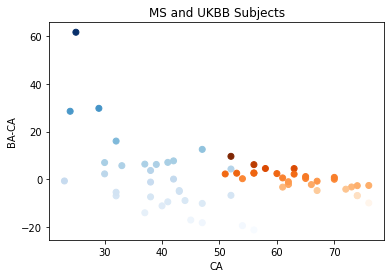

In [25]:
plt.scatter(MS_df['CA'], MS_df['DIFF'], c=MS_df['DIFF'], cmap = 'Blues')
plt.scatter(UKBB_df_reduced['CA'], UKBB_df_reduced['DIFF'], c=UKBB_df_reduced['DIFF'], cmap = 'Oranges')
plt.title('MS and UKBB Subjects')
plt.xlabel('CA')
plt.ylabel('BA-CA')
#plt.show()
plt.savefig('scatAll.png')


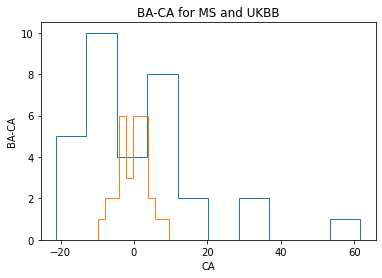

In [26]:
plt.hist(MS_df['DIFF'], histtype='step')
plt.hist(UKBB_df_reduced['DIFF'], histtype='step')
plt.title('BA-CA for MS and UKBB')
plt.xlabel('CA')
plt.ylabel('BA-CA')
#plt.show()
plt.savefig('histAll.png')


Compare UKBB subjects that are in their 40s to MS patients in their 40s

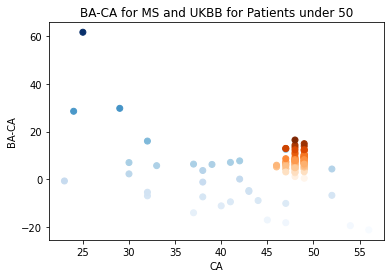

In [27]:
UKBB_df_40s = UKBB_df[UKBB_df.CA < 50.000000]
plt.scatter(MS_df['CA'], MS_df['DIFF'], c=MS_df['DIFF'], cmap = 'Blues')
plt.scatter(UKBB_df_40s['CA'], UKBB_df_40s['DIFF'], c=UKBB_df_40s['DIFF'], cmap = 'Oranges')
plt.title('BA-CA for MS and UKBB for Patients under 50')
plt.xlabel('CA')
plt.ylabel('BA-CA')
#plt.show()
plt.savefig('scat50.png')


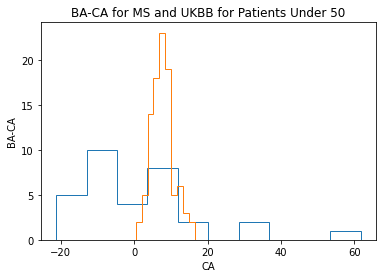

In [28]:
plt.hist(MS_df['DIFF'], histtype='step')
plt.hist(UKBB_df_40s['DIFF'], histtype='step')
plt.title('BA-CA for MS and UKBB for Patients Under 50')
plt.xlabel('CA')
plt.ylabel('BA-CA')
#plt.show()
plt.savefig('hist50.png')


In [29]:
# mean
print("MS")
print(MS_df.loc[:'DIFF'].mean())
print("UKBB")
print(UKBB_df.loc[:'DIFF'].mean())
print("UKBB_40s")
print(UKBB_df_40s.loc[:'DIFF'].mean())


MS
ID      31.625000
BA      40.140496
CA      39.156250
DIFF     0.984246
dtype: float64
UKBB
ID      1.397891e+06
BA      6.399886e+01
CA      6.453050e+01
DIFF   -5.316375e-01
dtype: float64
UKBB_40s
ID      1.399887e+06
BA      5.604291e+01
CA      4.838144e+01
DIFF    7.661465e+00
dtype: float64


In [30]:
# median
print("MS")
print(MS_df.loc[:'DIFF'].median())
print("UKBB")
print(UKBB_df.loc[:'DIFF'].median())
print("UKBB_40s")
print(UKBB_df_40s.loc[:'DIFF'].median())

MS
ID      32.500000
BA      37.470693
CA      39.500000
DIFF    -0.927370
dtype: float64
UKBB
ID      1.396416e+06
BA      6.392200e+01
CA      6.500000e+01
DIFF   -6.354885e-01
dtype: float64
UKBB_40s
ID      1.389809e+06
BA      5.604485e+01
CA      4.900000e+01
DIFF    7.507473e+00
dtype: float64


Network Graphs

In [31]:
from IPython.display import SVG
from sknetwork.path import get_distances
from sknetwork.visualization import svg_graph, svg_bigraph
from sknetwork.utils import bipartite2undirected
import networkx as nx
from matplotlib.pyplot import figure

,CONNECTIONS
47.0,3
32.0,3
38.0,3
42.0,2
37.0,2


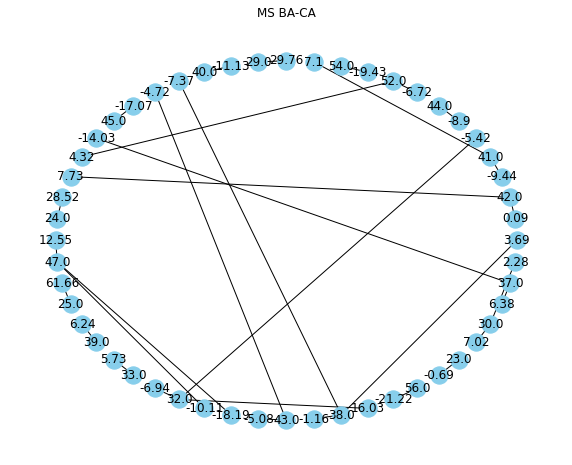

In [32]:
G = nx.Graph()
MS_df = MS_df.round(2)
G = nx.from_pandas_edgelist(MS_df, 'DIFF','CA')
figure(figsize=(10, 8))
ax = plt.gca()
ax.set_title('MS BA-CA')
nx.draw_shell(G, with_labels=True, node_color='#87CEEB')
plt.savefig('MSgraph.png')

leaderboard = {}
for x in G.nodes:
 leaderboard[x] = len(G[x])
s = pd.Series(leaderboard, name='CONNECTIONS')
df2 = s.to_frame().sort_values('CONNECTIONS', ascending=False)
df2.head()

,CONNECTIONS
49.00,51
48.00,29
47.00,10
46.00,3
5.49,2


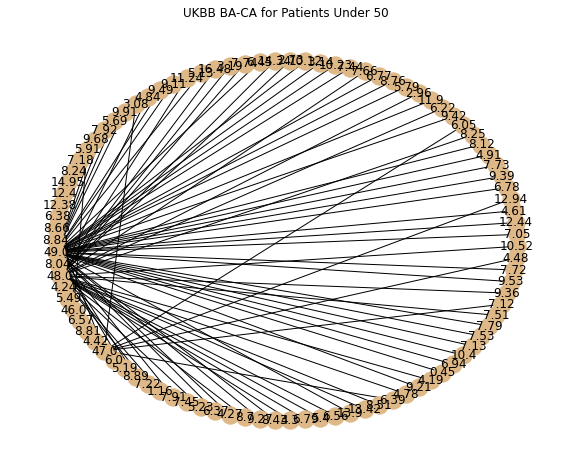

In [33]:
G = nx.Graph()
UKBB_df_40s = UKBB_df_40s.round(2)
G = nx.from_pandas_edgelist(UKBB_df_40s, 'DIFF','CA')
figure(figsize=(10, 8))
ax = plt.gca()
ax.set_title('UKBB BA-CA for Patients Under 50')
nx.draw_shell(G, with_labels=True, node_color='#DEB887')
plt.savefig('UKBB50graph.png')

leaderboard = {}
for x in G.nodes:
 leaderboard[x] = len(G[x])
s = pd.Series(leaderboard, name='CONNECTIONS')
df2 = s.to_frame().sort_values('CONNECTIONS', ascending=False)
df2.head()

,CONNECTIONS
74.0,3
62.0,3
56.0,3
63.0,2
65.0,2


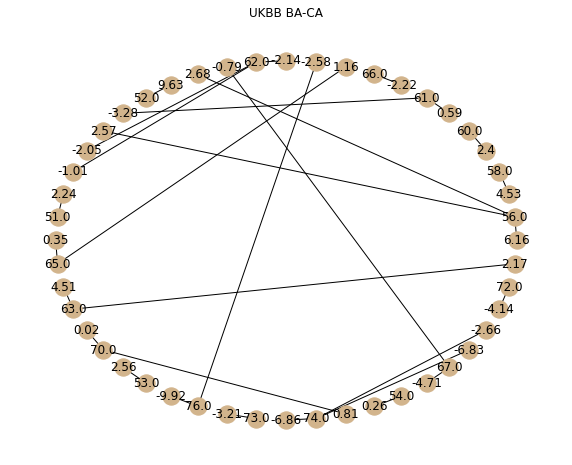

In [34]:
G = nx.Graph()
UKBB_df_reduced = UKBB_df_reduced.round(2)
G = nx.from_pandas_edgelist(UKBB_df_reduced, 'DIFF','CA')
figure(figsize=(10, 8))
ax = plt.gca()
ax.set_title('UKBB BA-CA')
nx.draw_shell(G, with_labels=True, node_color = '#D2B48C')
plt.savefig('UKBBgraph.png')

leaderboard = {}
for x in G.nodes:
 leaderboard[x] = len(G[x])
s = pd.Series(leaderboard, name='CONNECTIONS')
df2 = s.to_frame().sort_values('CONNECTIONS', ascending=False)
df2.head()

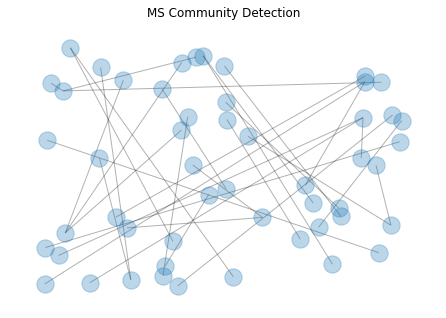

In [35]:
df = MS_df.drop(MS_df.columns[0], axis=1)
df = df.drop(df.columns[0], axis=1)

G = nx.from_pandas_edgelist(df, 'CA', 'DIFF')
#nx.draw_networkx(G)

GMG = nx.MultiGraph(G)
comms = community_louvain.best_partition(GMG)
unique_coms = np.unique(list(comms.values()))
cmap = {
    0 : 'maroon',
    1 : 'teal',
    2 : 'black', 
    3 : 'orange',
    4 : 'green',
    5 : 'yellow'
}

pos = nx.random_layout(GMG)
nx.draw(G, pos, alpha = 0.3)
plt.title('MS Community Detection')
#plt.show()
plt.savefig('MSCommRand.png', bbox_inches='tight')

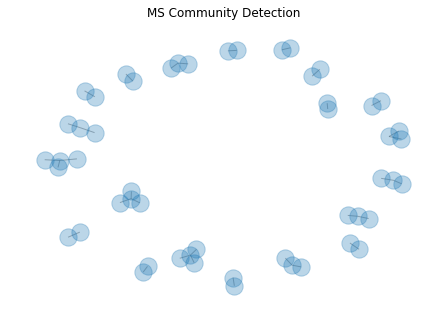

In [36]:
pos = nx.spring_layout(GMG)
nx.draw(G, pos, alpha = 0.3, edge_color = 'black')
plt.title('MS Community Detection')
#plt.show()
plt.savefig('MSCommSpring.png', bbox_inches='tight')

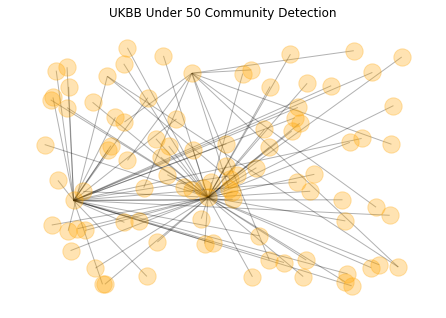

In [37]:
df = UKBB_df_40s.drop(UKBB_df_40s.columns[0], axis=1)
df = df.drop(df.columns[0], axis=1)

G = nx.from_pandas_edgelist(df, 'CA', 'DIFF')
#nx.draw_networkx(G)

GMG = nx.MultiGraph(G)
comms = community_louvain.best_partition(GMG)
unique_coms = np.unique(list(comms.values()))
cmap = {
    0 : 'maroon',
    1 : 'teal',
    2 : 'black', 
    3 : 'orange',
    4 : 'green',
    5 : 'yellow'
}

pos = nx.random_layout(GMG)
nx.draw(G, pos, alpha = 0.3, node_color = 'orange')
plt.title('UKBB Under 50 Community Detection')
#plt.show()
plt.savefig('UKBB50CommRand.png', bbox_inches='tight')

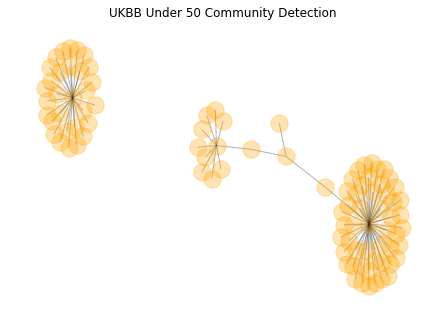

In [38]:
pos = nx.spring_layout(GMG)
nx.draw(G, pos, alpha = 0.3, node_color = 'orange')
plt.title('UKBB Under 50 Community Detection')
#plt.show()
plt.savefig('UKBB50CommSpring.png', bbox_inches='tight')

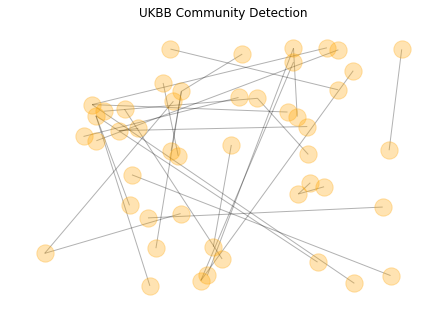

In [39]:
df = UKBB_df_reduced.drop(UKBB_df_reduced.columns[0], axis=1)
df = df.drop(df.columns[0], axis=1)

G = nx.from_pandas_edgelist(df, 'CA', 'DIFF')
#nx.draw_networkx(G)

GMG = nx.MultiGraph(G)
comms = community_louvain.best_partition(GMG)
unique_coms = np.unique(list(comms.values()))
cmap = {
    0 : 'maroon',
    1 : 'teal',
    2 : 'black', 
    3 : 'orange',
    4 : 'green',
    5 : 'yellow'
}

pos = nx.random_layout(GMG)
nx.draw(G, pos, alpha = 0.3, node_color = 'orange')
plt.title('UKBB Community Detection')
#plt.show()
plt.savefig('UKBBCommRand.png', bbox_inches='tight')

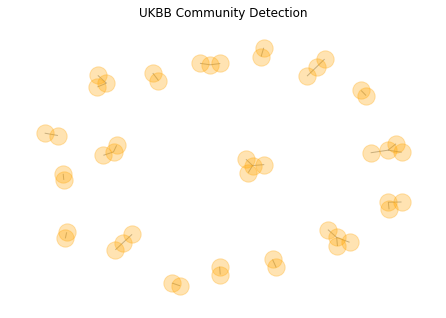

In [40]:
pos = nx.spring_layout(GMG)
nx.draw(G, pos, alpha = 0.3, node_color = 'orange')
plt.title('UKBB Community Detection')
#plt.show()
plt.savefig('UKBBCommSpring.png', bbox_inches='tight')